# Preparing the Data

### Q. Find publicly available data for key factors that influence US home prices nationally. Then, build a data science model that explains how these factors impacted home prices over the last 20 years.

## Importing required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Getting the data (2000 - 2022)

### House Prices in USA

In [2]:
# house Prices in US 
house_prices = pd.read_csv("CSUSHPISA.csv")
house_prices = house_prices.iloc[:-8]
house_prices.head() #276 rows

,DATE,house_price
0,1/1/2000,100.551
1,2/1/2000,101.339
2,3/1/2000,102.127
3,4/1/2000,102.922
4,5/1/2000,103.678


### Interest on Mortgage for 15 years

In [3]:
# Interest on Mortgage for 15 years
df = pd.read_csv("MORTGAGE15US (1).csv")
df['DATE'] = pd.to_datetime(df['DATE'])

# Group by month and calculate the average
df_monthly_avg = df.groupby(df['DATE'].dt.to_period('M')).mean()

# Reset index to have 'DATE' as a column
df_monthly_avg = df_monthly_avg.reset_index()

interest_15 = df_monthly_avg 
interest_15.head()#276 rows

,DATE,MORTGAGE15US
0,2000-01,7.8025
1,2000-02,7.9325
2,2000-03,7.8320
3,2000-04,7.8000
4,2000-05,8.1825


### Interest on Mortgage for 30 years

In [4]:
# Interest on Mortgage for 30 years
df_1 = pd.read_csv("MORTGAGE30US (1).csv")
df_1['DATE'] = pd.to_datetime(df_1['DATE'])

# Group by month and calculate the average
df_1_monthly_avg = df_1.groupby(df['DATE'].dt.to_period('M')).mean()

# Reset index to have 'DATE' as a column
df_1_monthly_avg = df_1_monthly_avg.reset_index()
interest_30 = df_1_monthly_avg
interest_30.head()#276 rows

,DATE,MORTGAGE30US
0,2000-01,8.2100
1,2000-02,8.3250
2,2000-03,8.2400
3,2000-04,8.1525
4,2000-05,8.5150


### GDP_Growth_Rate

In [5]:
df_2 = pd.read_csv("A191RL1Q225SBEA.csv")
# convert to period
df_2['DATE'] = pd.to_datetime(df_2['DATE']).dt.to_period('M')

# set Date as index and resample
df_2_monthly_growth = df_2.set_index('DATE').resample('M').interpolate()

gdp_growth_rate = df_2_monthly_growth.iloc[:-1]

gdp_growth_rate = gdp_growth_rate.rename(columns={'A191RL1Q225SBEA': 'GDP_growth_rate'})

gdp_growth_rate.head()#276 rows


,GDP_growth_rate
DATE,
2000-01,1.500000
2000-02,3.500000
2000-03,5.500000
2000-04,7.500000
2000-05,5.133333


### Median_Household_Income

<AxesSubplot:xlabel='DATE'>

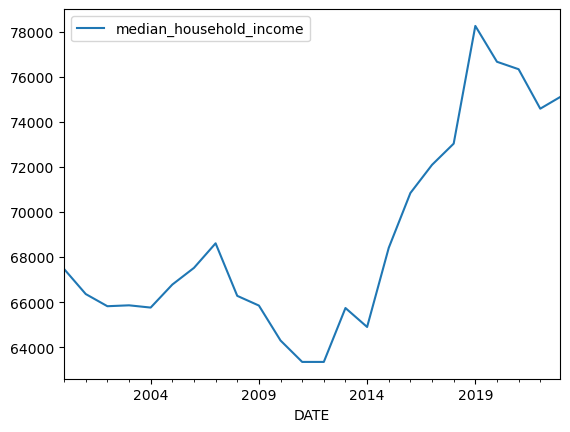

In [6]:
df_3 = pd.read_csv("MEHOINUSA672N.csv")
#extend the data till 2023
new_data = {'DATE': '2023-01-01', 'MEHOINUSA672N': 75143}

new_row = pd.DataFrame([new_data])

df_3 = pd.concat([df_3, new_row], ignore_index=True)
#Turning the annual data to monthly
df_3['DATE'] = pd.to_datetime(df_3['DATE']).dt.to_period('M')

df_3_monthly_growth = df_3.set_index('DATE').resample('M').interpolate()
median_household_income = df_3_monthly_growth.iloc[:-1]
# Changing the column name
median_household_income = median_household_income.rename(columns={'MEHOINUSA672N': 'median_household_income'})


median_household_income.round().plot()


### Unemployment Rate

In [7]:
df_4 = pd.read_csv("UNRATE.csv")
# Reset index
df_4.reset_index(drop=True, inplace=True)

unemployment_data = df_4.rename(columns={"UNRATE":"unemployment_rate"}).set_index("DATE")


unemployment_data

,unemployment_rate
DATE,
2000-01-01,4.0
2000-02-01,4.1
2000-03-01,4.0
2000-04-01,3.8
2000-05-01,4.0
...,...
2022-08-01,3.7
2022-09-01,3.5
2022-10-01,3.7


### Population Growth Rate

In [8]:
data = {'DATE': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
        'population_growth_rate': [1.15, 1.09, 1.01, 0.96, 0.97, 0.98, 0.98, 1.00, 0.97, 0.92, 0.87, 0.87, 0.88, 0.86, 0.83, 0.80, 0.80, 0.79, 0.71, 0.66, 0.49, 0.31, 0.38, 0.50]}

pop_growth_rate = pd.DataFrame(data)
pop_growth_rate['DATE'] = pd.to_datetime(pop_growth_rate['DATE'], format='%Y')
pop_growth_rate = pop_growth_rate.set_index('DATE')

# Resample to monthly frequency and interpolate
pop_growth_rate_monthly = pop_growth_rate.resample('M').interpolate()

# Calculate the average growth rate for each year
yearly_avg_growth_rate = pop_growth_rate.groupby(pop_growth_rate.index.year)['population_growth_rate'].mean()

# Create a new DataFrame for yearly average growth rate with monthly frequency
yearly_avg_growth_rate_monthly = pop_growth_rate_monthly.copy()
yearly_avg_growth_rate_monthly['population_growth_rate'] = pop_growth_rate_monthly.index.year.map(yearly_avg_growth_rate)

# Display the result
pop_growth_rate = yearly_avg_growth_rate_monthly.iloc[:-1]

pop_growth_rate.head() # 276 rows

,population_growth_rate
DATE,
2000-01-31,1.15
2000-02-29,1.15
2000-03-31,1.15
2000-04-30,1.15
2000-05-31,1.15


### Inflation Growth Rate

In [9]:
inflation_data = {'DATE': ['12/1/1999', '12/1/2000', '12/1/2001', '12/1/2002', '12/1/2003', '12/1/2004', '12/1/2005', '12/1/2006', '12/1/2007', '12/1/2008', '12/1/2009', '12/1/2010', '12/1/2011', '12/1/2012', '12/1/2013', '12/1/2014', '12/1/2015', '12/1/2016', '12/1/2017', '12/1/2018', '12/1/2019', '12/1/2020', '12/1/2021', '12/1/2022', '12/1/2023'],
                  'inflation_growth_rate': [2.68, 3.39, 1.55, 2.38, 1.88, 3.26, 3.42, 2.54, 4.08, 0.09, 2.72, 1.5, 2.96, 1.74, 1.5, 0.76, 0.73, 2.07, 2.11, 1.91, 2.29, 1.36, 7.04, 6.45, 3.7]}

inflation_growth_rate = pd.DataFrame(inflation_data)
inflation_growth_rate['DATE'] = pd.to_datetime(inflation_growth_rate['DATE'], format='%m/%d/%Y')
inflation_growth_rate = inflation_growth_rate.set_index('DATE')

# Resample to monthly frequency and interpolate
inflation_growth_rate_monthly = inflation_growth_rate.resample('M').interpolate()

# Calculate the average growth rate for each year
yearly_avg_inflation_growth_rate = inflation_growth_rate.groupby(inflation_growth_rate.index.year)['inflation_growth_rate'].mean()

# Create a new DataFrame for yearly average growth rate with monthly frequency
yearly_avg_inflation_growth_rate_monthly = inflation_growth_rate_monthly.copy()
yearly_avg_inflation_growth_rate_monthly['inflation_growth_rate'] = inflation_growth_rate_monthly.index.year.map(yearly_avg_inflation_growth_rate)

# Display the result
inflation_growth_rate = yearly_avg_inflation_growth_rate_monthly.iloc[1:-12]
inflation_growth_rate

,inflation_growth_rate
DATE,
2000-01-31,3.39
2000-02-29,3.39
2000-03-31,3.39
2000-04-30,3.39
2000-05-31,3.39
...,...
2022-08-31,6.45
2022-09-30,6.45
2022-10-31,6.45


## Datasets to Merge

In [10]:
###  house_prices(CSUSHPISA), 
#interest_30(Interest Rates:), 
#interest_15(Interest Rates:), 
#gdp_growth_rate(Economic Indicators:), 
#unemployment rates(Economic Indicators:), 
#median_household_income(Financial Indicators:),
#pop_growth_rate,
#inflation_growth_rate,


In [11]:
import pandas as pd

# Assuming you have separate DataFrames for each feature
# house_prices, interest_30, interest_15, gdp_growth_rate, 
# unemployment_data, median_household_income, pop_growth_rate, inflation_growth_rate

# Ensure all DataFrames have the 'DATE' column
house_prices = house_prices.reset_index()
interest_30 = interest_30.reset_index()
interest_15 = interest_15.reset_index()
gdp_growth_rate = gdp_growth_rate.reset_index()
unemployment_data = unemployment_data.reset_index()
median_household_income = median_household_income.reset_index()
pop_growth_rate = pop_growth_rate.reset_index()
inflation_growth_rate = inflation_growth_rate.reset_index()



In [12]:
result_df = pd.concat([house_prices, interest_30, interest_15, gdp_growth_rate, unemployment_data, median_household_income, pop_growth_rate, inflation_growth_rate], axis=1)

result_df = result_df.loc[:,~result_df.columns.duplicated()]

result_df.round()

,index,DATE,house_price,MORTGAGE30US,MORTGAGE15US,GDP_growth_rate,unemployment_rate,median_household_income,population_growth_rate,inflation_growth_rate
0,0,1/1/2000,101.0,8.0,8.0,2.0,4.0,67470.0,1.0,3.0
1,1,2/1/2000,101.0,8.0,8.0,4.0,4.0,67378.0,1.0,3.0
2,2,3/1/2000,102.0,8.0,8.0,6.0,4.0,67285.0,1.0,3.0
3,3,4/1/2000,103.0,8.0,8.0,8.0,4.0,67192.0,1.0,3.0
4,4,5/1/2000,104.0,9.0,8.0,5.0,4.0,67100.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
271,271,8/1/2022,302.0,5.0,5.0,3.0,4.0,74908.0,0.0,6.0
272,272,9/1/2022,299.0,6.0,5.0,3.0,4.0,74955.0,0.0,6.0
273,273,10/1/2022,299.0,7.0,6.0,3.0,4.0,75002.0,0.0,6.0
274,274,11/1/2022,298.0,7.0,6.0,2.0,4.0,75049.0,0.0,6.0


In [13]:
# Assuming your DataFrame is named result_df
correlation_matrix = result_df.corr()

# Display the correlation matrix
print(correlation_matrix)


                            index  house_price  MORTGAGE30US  MORTGAGE15US  \
index                    1.000000     0.816604     -0.814939     -0.811002   
house_price              0.816604     1.000000     -0.469010     -0.455778   
MORTGAGE30US            -0.814939    -0.469010      1.000000      0.995454   
MORTGAGE15US            -0.811002    -0.455778      0.995454      1.000000   
GDP_growth_rate          0.040974     0.047156     -0.095655     -0.101211   
unemployment_rate       -0.038252    -0.309168     -0.285281     -0.286705   
median_household_income  0.741926     0.799212     -0.424244     -0.394475   
population_growth_rate  -0.905067    -0.892178      0.695195      0.690462   
inflation_growth_rate    0.201912     0.550868      0.049642      0.051649   

                         GDP_growth_rate  unemployment_rate  \
index                           0.040974          -0.038252   
house_price                     0.047156          -0.309168   
MORTGAGE30US                  

In [14]:

result_df


,index,DATE,house_price,MORTGAGE30US,MORTGAGE15US,GDP_growth_rate,unemployment_rate,median_household_income,population_growth_rate,inflation_growth_rate
0,0,1/1/2000,100.551,8.2100,7.8025,1.500000,4.0,67470.000000,1.15,3.39
1,1,2/1/2000,101.339,8.3250,7.9325,3.500000,4.1,67377.500000,1.15,3.39
2,2,3/1/2000,102.127,8.2400,7.8320,5.500000,4.0,67285.000000,1.15,3.39
3,3,4/1/2000,102.922,8.1525,7.8000,7.500000,3.8,67192.500000,1.15,3.39
4,4,5/1/2000,103.678,8.5150,8.1825,5.133333,4.0,67100.000000,1.15,3.39
...,...,...,...,...,...,...,...,...,...,...
271,271,8/1/2022,301.596,5.2225,4.5625,2.666667,3.7,74908.416667,0.38,6.45
272,272,9/1/2022,299.380,6.1120,5.3500,2.633333,3.5,74955.333333,0.38,6.45
273,273,10/1/2022,298.922,6.9000,6.1450,2.600000,3.7,75002.250000,0.38,6.45
274,274,11/1/2022,298.312,6.8050,6.1375,2.466667,3.6,75049.166667,0.38,6.45


In [15]:
result_df.columns

Index(['index', 'DATE', 'house_price', 'MORTGAGE30US', 'MORTGAGE15US',
       'GDP_growth_rate', 'unemployment_rate', 'median_household_income',
       'population_growth_rate', 'inflation_growth_rate'],
      dtype='object')

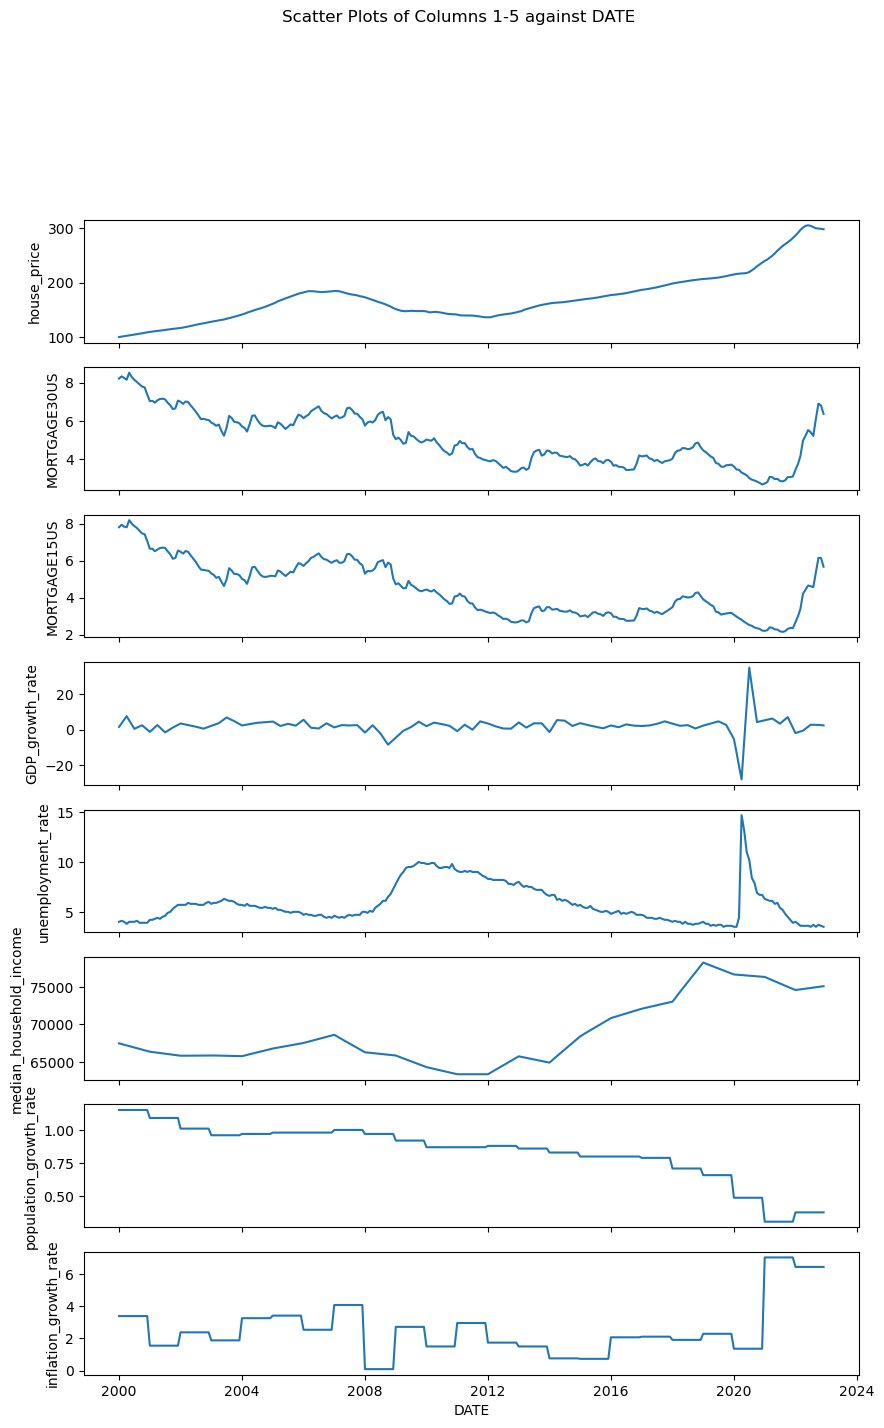

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'result_df' is your DataFrame with the results
# Convert the 'DATE' column to datetime for proper plotting
result_df['DATE'] = pd.to_datetime(result_df['DATE'])

# Set up subplots
fig, axes = plt.subplots(nrows=8, ncols=1, figsize=(10, 15), sharex=True)

# Plot each column against 'DATE'
for i, column in enumerate(['house_price', 'MORTGAGE30US', 'MORTGAGE15US', 'GDP_growth_rate', 'unemployment_rate','median_household_income','population_growth_rate','inflation_growth_rate']):
    sns.lineplot(x=result_df['DATE'], y=result_df[column], ax=axes[i])
    axes[i].set_ylabel(column)

# Set common xlabel and title
plt.xlabel('DATE')
plt.suptitle('Scatter Plots of Columns 1-5 against DATE', y=1.02)

# Display the plots
plt.show()


In [17]:
result_df.columns

Index(['index', 'DATE', 'house_price', 'MORTGAGE30US', 'MORTGAGE15US',
       'GDP_growth_rate', 'unemployment_rate', 'median_household_income',
       'population_growth_rate', 'inflation_growth_rate'],
      dtype='object')

## To Save the result_df as a csv for model building

In [18]:
#result_df.to_csv("prepared_df.csv")

# Bibliography

1. **House Prices:**           https://fred.stlouisfed.org/series/CSUSHPISA
2. **30-Year Mortgage Rate:**  https://fred.stlouisfed.org/series/MORTGAGE30US
3. **15-Year Mortgage Rate**    https://fred.stlouisfed.org/series/MORTGAGE15US
4. **GDP Growth Rate**          https://fred.stlouisfed.org/series/A191RL1Q225SBEA
5. **Unemployment Rate**        https://fred.stlouisfed.org/series/UNRATE
6. **Median Household Income**  https://fred.stlouisfed.org/series/MEHOINUSA672N
7. **Population Growth Rate**   https://www.macrotrends.net/countries/USA/united-states/population-growth-rate
8. **Inflation Growth Rate**    https://www.macrotrends.net/countries/USA/united-states/inflation-rate-cpi

1. [**House Prices**](https://fred.stlouisfed.org/series/CSUSHPISA)
2. [**30-Year Mortgage Rate**](https://fred.stlouisfed.org/series/MORTGAGE30US)
3. [**15-Year Mortgage Rate**](https://fred.stlouisfed.org/series/MORTGAGE15US)
4. [**GDP Growth Rate**](https://fred.stlouisfed.org/series/A191RL1Q225SBEA)
5. [**Unemployment Rate**](https://fred.stlouisfed.org/series/UNRATE)
6. [**Median Household Income**](https://fred.stlouisfed.org/series/MEHOINUSA672N)
7. [**Population Growth Rate**](https://www.macrotrends.net/countries/USA/united-states/population-growth-rate)
8. [**Inflation Growth Rate**](https://www.macrotrends.net/countries/USA/united-states/inflation-rate-cpi)